In [1]:
from mpl_toolkits.mplot3d import Axes3D
%pylab nbagg
from tvb.simulator.lab import *

Populating the interactive namespace from numpy and matplotlib
2019-11-13 10:06:53,107 - WARNING - tvb.simulator.common - psutil module not available: no warnings will be issued when a
    simulation may require more memory than available
   INFO  log level set to INFO
   INFO  NumExpr defaulting to 8 threads.
WARNING  Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.epileptor.Epileptor.state_variable_range = Final(field_type=<class 'dict'>, default={'x1': array([-2.,  1.]), 'y1': array([-20.,   2.]), 'z': array([2., 5.]), 'x2': array([-2.,  0.]), 'y2': array([0., 2.]), 'g': array([-1.,  1.])}, required=True)
WARNING  default contains values out of the declared domain. Ex 1.0 
   attribute  tvb.simulator.models.epileptor.Epileptor2D.tt = NArray(label='tt', dtype=float64, default=array([1.]), dim_names=(), ndim=None, required=True)
WARNING  Field seems mutable and has a default value. Consider using a lambda as a 

WARNING  Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.oscillator.SupHopf.state_variable_range = Final(field_type=<class 'dict'>, default={'x': array([-5.,  5.]), 'y': array([-5.,  5.])}, required=True)
WARNING  Field seems mutable and has a default value. Consider using a lambda as a value factory 
   attribute tvb.simulator.models.stefanescu_jirsa.ReducedSetFitzHughNagumo.state_variable_range = Final(field_type=<class 'dict'>, default={'xi': array([-4.,  4.]), 'eta': array([-3.,  3.]), 'alpha': array([-4.,  4.]), 'beta': array([-3.,  3.])}, required=True)
WARNING  default contains values out of the declared domain. Ex 1.0 
   attribute  tvb.simulator.models.stefanescu_jirsa.ReducedSetHindmarshRose.a = NArray(label=':math:`a`', dtype=float64, default=array([1.]), dim_names=(), ndim=None, required=True)
WARNING  default contains values out of the declared domain. Ex 3.0 
   attribute  tvb.simulator.models.stef

# Display the local connectivity kernel definining the local coupling strength for one focal point

When defining stimuli on the cortical surface, it's useful to visualize the spatial pattern being implemented:

Here, we'll redefine the local connectivity kernel,

<IPython.core.display.Javascript object>


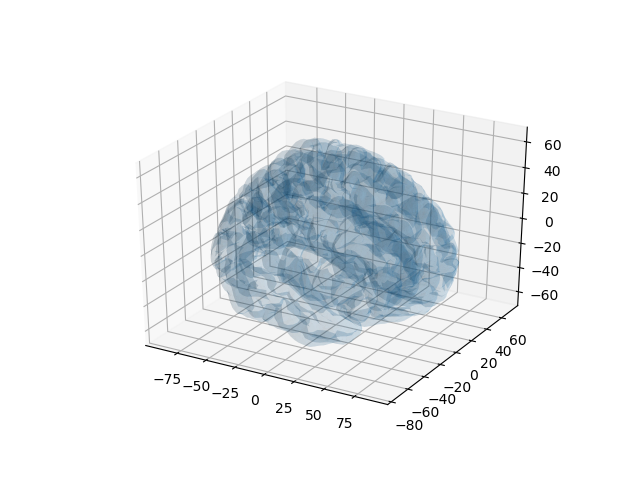

In [2]:
# # configure local connectivity kernel
# loc_cortex = cortex.Cortex().from_file()
# loc_conn = local_connectivity.LocalConnectivity(cutoff=20.0, surface=loc_cortex.region_mapping_data.surface)
# loc_conn.equation.parameters['sigma'] = 10.0
# loc_conn.equation.parameters['amp'] = 1.0

# configure cortical surface
ctx = cortex.Cortex.from_file()
loc_conn = local_connectivity.LocalConnectivity(cutoff=20.0, surface=ctx.region_mapping_data.surface)
loc_conn.equation.parameters['sigma'] = 10.0
loc_conn.equation.parameters['amp'] = 1.0
ctx.local_connectivity = loc_conn
ctx.coupling_strength = numpy.array([0.0115])
ctx.configure()

# plot 
figure()
ax = subplot(111, projection='3d')
x, y, z = ctx.vertices.T
ax.plot_trisurf(x, y, z, triangles=ctx.triangles, alpha=0.1, edgecolor='none')

In [3]:
ctx

,value
Type,Cortex
"coupling_strength [min, median, max]","[0.0115, 0.0115, 0.0115]"
coupling_strength dtype,float64
coupling_strength shape,"(1,)"
gid,UUID('f30a3f2b-d8f9-4c13-9409-ad3562c5cb01')
local_connectivity,LocalConnectivity gid: b1165eca-c9b1-4f4c-a0d2-7f5b24e9e5eb
region_mapping_data,RegionMapping gid: 600a64a1-b81c-42bc-9fd6-7ab65a1a8662
title,Cortex gid: f30a3f2b-d8f9-4c13-9409-ad3562c5cb01
